## Lactic Acid: Transfer Component Analysis (TCA)

In [1]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
import itertools
from traintest import *
from dataloader import DataLoad
from tca import *
%load_ext autoreload
%autoreload 2

### 1. Loading Data

In [2]:

D = DataLoad(glucose=False)
D.load_data()
Xs, ys, Xt, yt, wl = D.X_source, D.y_source, D.X_target, D.y_target, D.wl

### 2. Training Model on Source Data and Test on Target Data (Baseline Model, No Domain Adaptation)

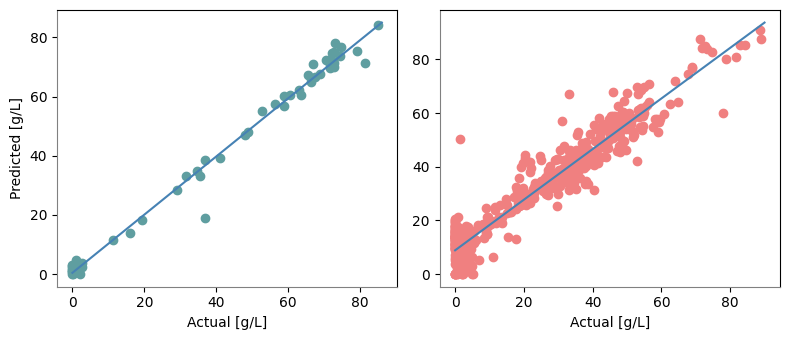

  Test on Model  R-sq RMSE RMSEP [%]  RPD
0  Source  PLSR  0.99  3.4       4.0  9.0
1  Target  PLSR  0.79  9.4      10.6  2.2


In [3]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.2, random_state=42)
models = train(Xs_train, ys_train, plsr_comp=12)
print(test(models, Xs_test, ys_test, Xt, yt))

### 3. Evaluate Domain Adaptation Performance of TCA

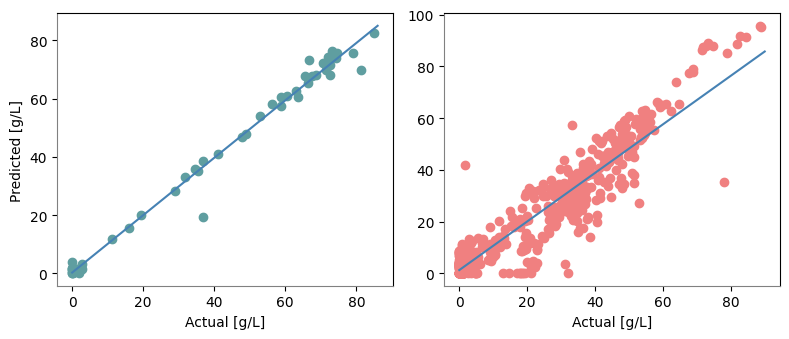

  Test on Model  R-sq RMSE RMSEP [%]  RPD
0  Source  PLSR  0.99  3.4       4.0  9.0
1  Target  PLSR  0.87  7.4       8.3  2.8


In [4]:

# TCA transform
tca = TCA(kernel_type='rbf', dim=20, lamb=0.001, gamma=0.01)
Xs_tca, Xt_tca = tca.fit_transform(np.vstack((Xs_train, Xs_test)), Xt)
Xs_train_tca, Xs_test_tca = Xs_tca[:len(Xs_train)], Xs_tca[len(Xs_train):]

models = train(Xs_train_tca, ys_train, plsr_comp=18)
print(test(models, Xs_test_tca, ys_test, Xt_tca, yt))